
## Análise e visualização de dados - Ranking dos Jogadores de Tennis no periodo de 1973-2017 
<img src="https://www.sportsmirchi.com/wp-content/uploads/2016/10/ATP-World-Tour-Calendar.jpg" width="420" height="300">

Dados obtidos em:
https://datahub.io/sports-data/atp-world-tour-tennis-data#resource-rankings_1973-2017

https://pkgstore.datahub.io/sports-data/atp-world-tour-tennis-data/rankings_1973-2017_csv/data/79dd58b82401b1e872c23d4d2b6365fb/rankings_1973-2017_csv.csv


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Lendo o Dataframe 

In [2]:
tennis_df = pd.read_csv('https://pkgstore.datahub.io/sports-data/atp-world-tour-tennis-data/rankings_1973-2017_csv/data/79dd58b82401b1e872c23d4d2b6365fb/rankings_1973-2017_csv.csv')

### Demonstrando as primeiras 5 linhas do Dataframe 

In [3]:
tennis_df.head()

,week_title,week_year,week_month,week_day,rank_text,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
0,2017.11.20,2017,11,20,1,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
1,2017.11.20,2017,11,20,2,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324
2,2017.11.20,2017,11,20,3,3,3.0,up,26.0,5150,23,/en/players/grigor-dimitrov/d875/overview,grigor-dimitrov,d875
3,2017.11.20,2017,11,20,4,4,1.0,down,20.0,4610,25,/en/players/alexander-zverev/z355/overview,alexander-zverev,z355
4,2017.11.20,2017,11,20,5,5,1.0,down,24.0,4015,27,/en/players/dominic-thiem/tb69/overview,dominic-thiem,tb69


### Alterando o Dataframe para facilitar as análises

In [4]:
tennis_df.rename(columns={'week_title':'week_title',
                   'week_year':'year',
                   'week_month':'month',
                   'week_day':'day',
                   'rank_text':'rank_text',
                   'rank_number':'rank_number',
                   'move_positions':'move_positions',
                   'move_direction':'move_direction',
                   'player_age':'player_age',
                   'ranking_points':'ranking_points',
                   'tourneys_played':'tourneys_played',
                   'player_url':'player_url',
                   'player_slug':'player_slug',
                   'player_id':'player_id'}, inplace=True)

In [5]:
tennis_df.head()

,week_title,year,month,day,rank_text,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
0,2017.11.20,2017,11,20,1,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
1,2017.11.20,2017,11,20,2,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324
2,2017.11.20,2017,11,20,3,3,3.0,up,26.0,5150,23,/en/players/grigor-dimitrov/d875/overview,grigor-dimitrov,d875
3,2017.11.20,2017,11,20,4,4,1.0,down,20.0,4610,25,/en/players/alexander-zverev/z355/overview,alexander-zverev,z355
4,2017.11.20,2017,11,20,5,5,1.0,down,24.0,4015,27,/en/players/dominic-thiem/tb69/overview,dominic-thiem,tb69


In [66]:
tennis_df.tail()

,week_title,year,month,day,rank_text,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
2694534,1973.08.23,1973,8,23,181,181,NaN,NaN,26.0,0,0,/en/players/humphrey-hose/h064/overview,humphrey-hose,h064
2694535,1973.08.23,1973,8,23,182,182,NaN,NaN,23.0,0,0,/en/players/franklin-robbins/r096/overview,franklin-robbins,r096
2694536,1973.08.23,1973,8,23,183,183,NaN,NaN,25.0,0,0,/en/players/david-lloyd/l083/overview,david-lloyd,l083
2694537,1973.08.23,1973,8,23,184,184,NaN,NaN,29.0,0,0,/en/players/nicola%20-spear/s146/overview,nicola%20-spear,s146
2694538,1973.08.23,1973,8,23,185,185,NaN,NaN,21.0,0,0,/en/players/kim-warwick/w006/overview,kim-warwick,w006



### Análise exploratória dos dados

In [6]:
tennis_df.shape

(2694539, 14)

In [7]:
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694539 entries, 0 to 2694538
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   week_title       object 
 1   year             int64  
 2   month            int64  
 3   day              int64  
 4   rank_text        object 
 5   rank_number      int64  
 6   move_positions   float64
 7   move_direction   object 
 8   player_age       float64
 9   ranking_points   int64  
 10  tourneys_played  int64  
 11  player_url       object 
 12  player_slug      object 
 13  player_id        object 
dtypes: float64(2), int64(6), object(6)
memory usage: 287.8+ MB


In [8]:
tennis_df.describe()

,year,month,day,rank_number,move_positions,player_age,ranking_points,tourneys_played
count,2.694539e+06,2.694539e+06,2.694539e+06,2.694539e+06,2.134023e+06,2.479980e+06,2.694539e+06,2.694539e+06
mean,2.002575e+03,6.624041e+00,1.582758e+01,8.242776e+02,1.376481e+01,2.292310e+01,8.099218e+01,7.176755e+00
std,9.302370e+00,3.434073e+00,8.708030e+00,5.027780e+02,4.138015e+01,4.130031e+00,3.640459e+02,8.740708e+00
min,1.973000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.995000e+03,4.000000e+00,8.000000e+00,4.010000e+02,2.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00
50%,2.003000e+03,7.000000e+00,1.600000e+01,7.970000e+02,4.000000e+00,2.200000e+01,3.000000e+00,3.000000e+00
75%,2.010000e+03,1.000000e+01,2.300000e+01,1.213000e+03,9.000000e+00,2.500000e+01,3.100000e+01,1.200000e+01
max,2.017000e+03,1.200000e+01,3.100000e+01,2.271000e+03,1.354000e+03,6.600000e+01,1.695000e+04,4.500000e+01


**Analisando a idade dos jogadores**

In [9]:
tennis_df['player_age'].unique()

array([31., 36., 26., 20., 24., 29., 25., 32., 30., 23., 22., 27., 34.,
       35., 28., 21., 18., 33., 19., 38., 37., 17., 39., 41., 16., nan,
       46., 15., 40., 45., 44., 14., 43., 48., 47., 42., 13., 66., 54.,
       58., 56., 10., 52.,  9., 55., 51., 53., 49., 12., 11.,  6.,  4.,
       50.,  3.,  5.,  8.,  7.,  1., 64., 63.])

In [10]:
tennis_df['player_age'].nunique()

59

In [11]:
tennis_df['player_age'].value_counts()

20.0    248717
21.0    243780
19.0    235739
22.0    231948
23.0    220139
24.0    201208
18.0    181924
25.0    172921
26.0    145007
27.0    117510
17.0     96343
28.0     93069
29.0     73044
30.0     53680
31.0     40729
16.0     30724
32.0     29760
33.0     19867
34.0     13034
35.0      8436
15.0      6395
36.0      5208
37.0      3116
38.0      1919
39.0      1428
40.0       703
14.0       681
41.0       410
42.0       365
45.0       254
44.0       243
43.0       238
13.0       194
12.0       148
46.0       139
10.0       114
11.0       110
48.0        99
49.0        86
47.0        73
9.0         72
52.0        67
3.0         61
8.0         48
6.0         37
55.0        30
54.0        26
50.0        25
4.0         25
53.0        23
51.0        22
5.0         21
56.0         7
7.0          7
64.0         2
1.0          2
66.0         1
58.0         1
63.0         1
Name: player_age, dtype: int64

In [49]:
moda = tennis_df['player_age'].mode(10)
print(moda)

0    20.0
dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

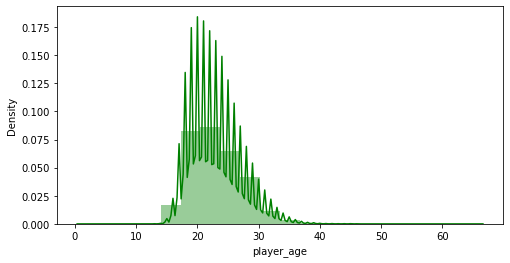

In [14]:
plt.figure(figsize=(8,4))
sns.distplot(tennis_df['player_age'], bins=20, color='green')

Filtrando os dados:

In [15]:
#gerando um dataframe apenas com os jogadores numero 1 no ranking nos anos 1973 a 2017
numero1_pt = tennis_df.query('rank_number == 1') 
len(numero1_pt)

1733

In [16]:
numero1_pt['player_slug'].value_counts()

roger-federer            301
pete-sampras             285
ivan-lendl               214
novak-djokovic           198
rafael-nadal             144
andre-agassi             100
lleyton-hewitt            80
john-mcenroe              73
stefan-edberg             72
jim-courier               58
gustavo-kuerten           43
andy-murray               37
jimmy-connors             29
mats-wilander             16
andy-roddick              13
boris-becker              12
ilie-nastase              10
marat-safin                9
bjorn-borg                 9
juan%20carlos-ferrero      8
marcelo-rios               6
yevgeny-kafelnikov         6
thomas-muster              6
carlos-moya                2
patrick-rafter             1
john-newcombe              1
Name: player_slug, dtype: int64

Text(0.5, 1.0, ' Jogador numero 1 no ranking em torneios nos anos 1973 a 2017')

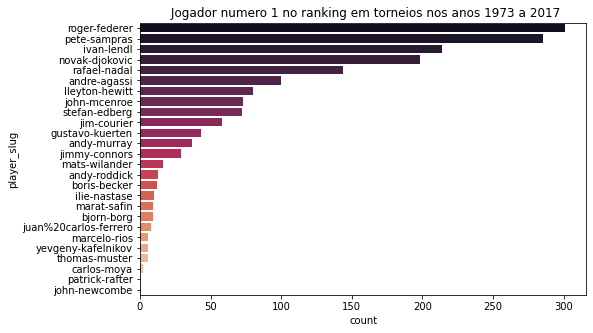

In [50]:
plt.figure(figsize=(8, 5))

sns.countplot(y='player_slug', 
    data=numero1_pt, 
    palette='rocket', 
    order=numero1_pt['player_slug'].value_counts().index).set_title(" Jogador numero 1 no ranking em torneios nos anos 1973 a 2017")

In [78]:
#gerando um dataframe apenas com os jogadores com melhores pontuacoes no ranking no ano de 2017
melhores_pt = tennis_df.query('year == 2017 and ranking_points >= 9000') 
len(melhores_pt)

48

In [79]:

print(melhores_pt)

       week_title  year  ...     player_slug  player_id
0      2017.11.20  2017  ...    rafael-nadal       n409
1      2017.11.20  2017  ...   roger-federer       f324
2000   2017.11.13  2017  ...    rafael-nadal       n409
2001   2017.11.13  2017  ...   roger-federer       f324
4027   2017.11.06  2017  ...    rafael-nadal       n409
4028   2017.11.06  2017  ...   roger-federer       f324
6070   2017.10.30  2017  ...    rafael-nadal       n409
6071   2017.10.30  2017  ...   roger-federer       f324
8133   2017.10.23  2017  ...    rafael-nadal       n409
10214  2017.10.16  2017  ...    rafael-nadal       n409
12300  2017.10.09  2017  ...    rafael-nadal       n409
14393  2017.10.02  2017  ...    rafael-nadal       n409
16489  2017.09.25  2017  ...    rafael-nadal       n409
18579  2017.09.18  2017  ...    rafael-nadal       n409
20678  2017.09.11  2017  ...    rafael-nadal       n409
37424  2017.07.10  2017  ...     andy-murray       mc10
39531  2017.07.03  2017  ...     andy-murray    

In [80]:
melhores_pt['player_slug'].value_counts()

andy-murray       24
rafael-nadal      11
novak-djokovic     9
roger-federer      4
Name: player_slug, dtype: int64

In [81]:
melhores_pt.head()

,week_title,year,month,day,rank_text,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
0,2017.11.20,2017,11,20,1,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
1,2017.11.20,2017,11,20,2,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324
2000,2017.11.13,2017,11,13,1,1,NaN,NaN,31.0,10645,17,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
2001,2017.11.13,2017,11,13,2,2,NaN,NaN,36.0,9005,16,/en/players/roger-federer/f324/overview,roger-federer,f324
4027,2017.11.06,2017,11,6,1,1,NaN,NaN,31.0,10645,17,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409


Text(0.5, 1.0, 'player_slug')

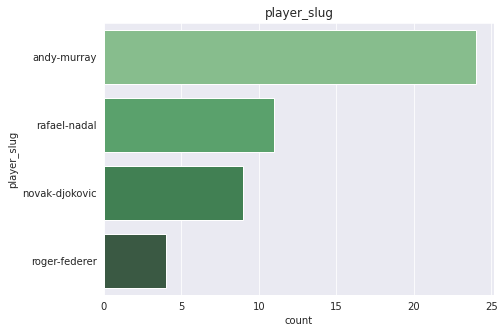

In [82]:
plt.figure(figsize=(7, 5)) #ajustando o tamanho do gráfico
 
sns.countplot(y='player_slug', 
    data=melhores_pt, 
    palette='Greens_d', 
    order=melhores_pt['player_slug'].value_counts().index).set_title("player_slug")

**Correlação**

In [83]:
#Analisando correlação apenas das principais colunas de dados numéricos
corr = tennis_df.loc[:, 'week_title': 'tourneys_played'].corr()
corr

,year,month,day,rank_number,move_positions,player_age,ranking_points,tourneys_played
year,1.000000,-0.014176,-0.007695,0.338801,0.057327,0.005346,0.116339,0.520477
month,-0.014176,1.000000,0.034534,0.006936,0.053184,-0.008238,-0.000365,0.010818
day,-0.007695,0.034534,1.000000,-0.001539,-0.007446,0.000175,-0.001299,-0.001788
rank_number,0.338801,0.006936,-0.001539,1.000000,0.088808,-0.271467,-0.300498,-0.433934
move_positions,0.057327,0.053184,-0.007446,0.088808,1.000000,-0.015177,-0.050729,-0.026570
player_age,0.005346,-0.008238,0.000175,-0.271467,-0.015177,1.000000,0.141588,0.164521
ranking_points,0.116339,-0.000365,-0.001299,-0.300498,-0.050729,0.141588,1.000000,0.381685
tourneys_played,0.520477,0.010818,-0.001788,-0.433934,-0.026570,0.164521,0.381685,1.000000


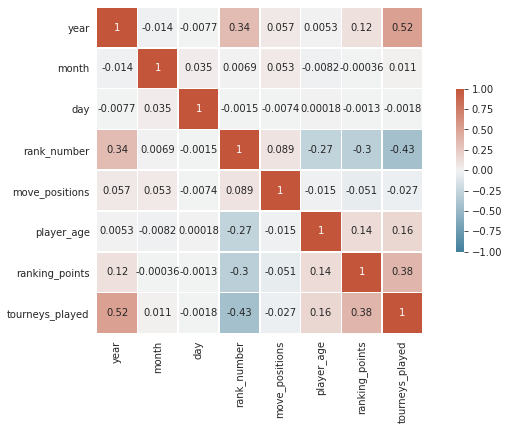

In [84]:
plt.figure(figsize=(12, 6))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

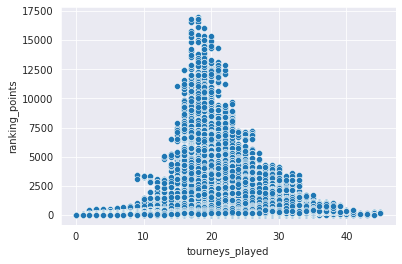

In [86]:
#Analisando correlação apenas de duas principais colunas 
sns.scatterplot(data=tennis_df, x="tourneys_played",y="ranking_points")

**Nuvem de palavras:**

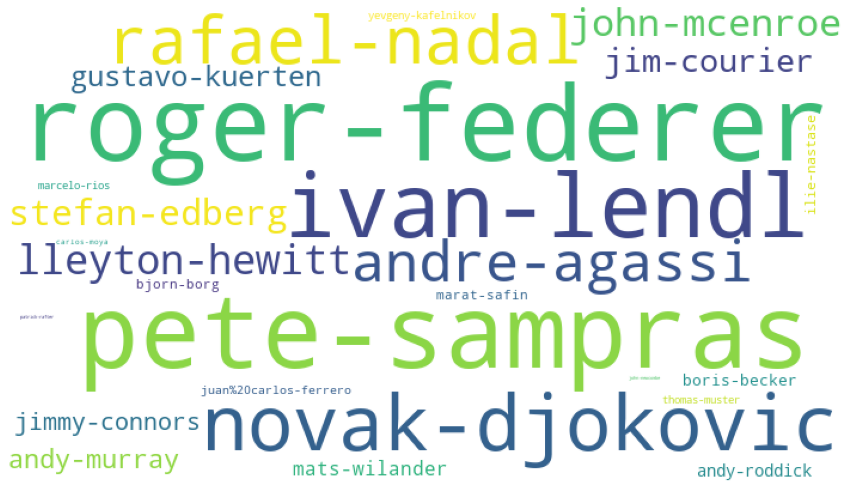

In [48]:
from wordcloud import WordCloud
from collections import Counter
allplayer = [trackname for trackname in numero1_pt['player_slug']]
wc_dict = Counter(allplayer)

wordcloud = WordCloud(width=700, height=400, background_color = 'white').generate_from_frequencies(wc_dict)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off');